### Frequency Analysis

Before comparing the gathered data to heuristics to determine whether specific users are more likely to be bots, I decided to plot generalized frequency data. This exercise helps to display overall trends across the four queries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mrvan_df = pd.read_pickle("data/processed_data/mrvan_1.pkl")
jrg_df = pd.read_pickle("data/processed_data/jrg_1.pkl")
in_df = pd.read_pickle("data/processed_data/in_1.pkl")
nwi_df = pd.read_pickle("data/processed_data/nwi_1.pkl")

In [7]:
mrvan_df["created_at_date"] = mrvan_df['created_at'].dt.date
jrg_df["created_at_date"] = jrg_df['created_at'].dt.date
in_df["created_at_date"] = in_df['created_at'].dt.date
nwi_df["created_at_date"] = nwi_df['created_at'].dt.date

mrvan_dates = mrvan_df["created_at_date"].value_counts().keys()
jrg_dates = jrg_df["created_at_date"].value_counts().keys()
nwi_dates = nwi_df["created_at_date"].value_counts().keys()
in_dates = in_df["created_at_date"].value_counts().keys()

dates = sorted(list(set(mrvan_dates) & set(jrg_dates) & set(nwi_dates) & set(in_dates)))
mrvan_freq = [mrvan_df["created_at_date"].value_counts()[date] for date in dates]
jrg_freq = [jrg_df["created_at_date"].value_counts()[date] if date in jrg_dates else 0 for date in dates]
in_freq = [in_df["created_at_date"].value_counts()[date] if date in in_dates else 0 for date in dates]
nwi_freq = [nwi_df["created_at_date"].value_counts()[date] if date in nwi_dates else 0 for date in dates]

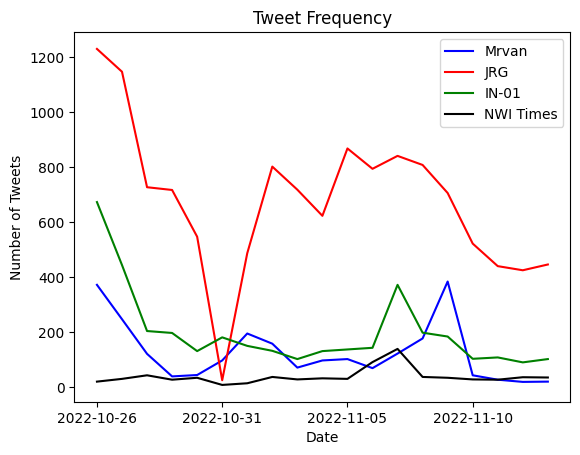

In [8]:
plt.plot(dates, mrvan_freq, color='blue', label="Mrvan")
plt.plot(dates, jrg_freq, color='red', label="JRG")
plt.plot(dates, in_freq, color='green', label="IN-01")
plt.plot(dates, nwi_freq, color='black', label="NWI Times")
plt.xticks(np.arange(min(dates), max(dates), 5))
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.title("Tweet Frequency")
plt.legend()

In [10]:
mrvan_df["created_at_hour"] = mrvan_df['created_at'].dt.hour
jrg_df["created_at_hour"] = jrg_df['created_at'].dt.hour
in_df["created_at_hour"] = in_df['created_at'].dt.hour
nwi_df["created_at_hour"] = nwi_df['created_at'].dt.hour

mrvan_hours = mrvan_df["created_at_hour"].value_counts().keys()
jrg_hours = jrg_df["created_at_hour"].value_counts().keys()
nwi_hours = nwi_df["created_at_hour"].value_counts().keys()
in_hours = in_df["created_at_hour"].value_counts().keys()

hours = sorted(list(set(mrvan_hours) & set(jrg_hours) & set(nwi_hours) & set(in_hours)))
mrvan_freq = [mrvan_df["created_at_hour"].value_counts()[hour] for hour in hours]
jrg_freq = [jrg_df["created_at_hour"].value_counts()[hour] if hour in jrg_hours else 0 for hour in hours]
in_freq = [in_df["created_at_hour"].value_counts()[hour] if hour in in_hours else 0 for hour in hours]
nwi_freq = [nwi_df["created_at_hour"].value_counts()[hour] if hour in nwi_hours else 0 for hour in hours]

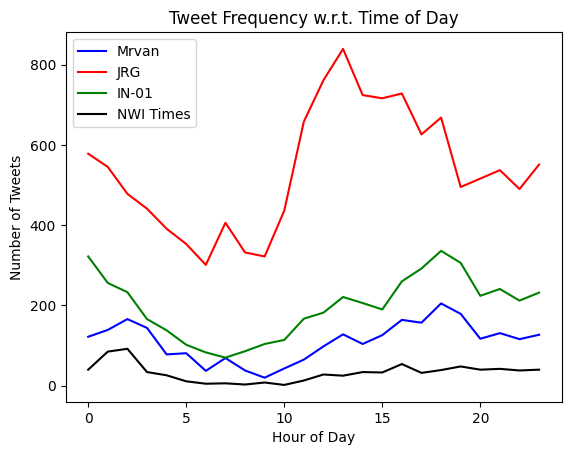

In [13]:
plt.plot(hours, mrvan_freq, color='blue', label="Mrvan")
plt.plot(hours, jrg_freq, color='red', label="JRG")
plt.plot(hours, in_freq, color='green', label="IN-01")
plt.plot(hours, nwi_freq, color='black', label="NWI Times")
plt.xticks(np.arange(min(hours), max(hours), 5))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Tweets")
plt.title("Tweet Frequency w.r.t. Time of Day")
plt.legend()

In [14]:
mrvan_df.to_pickle("data/processed_data/mrvan_2.pkl")
jrg_df.to_pickle("data/processed_data/jrg_2.pkl")
in_df.to_pickle("data/processed_data/in_2.pkl")
nwi_df.to_pickle("data/processed_data/nwi_2.pkl")